### **Data Reference:**

Source:The FAO portal to monitor Water Productivity through Open access of Remotely sensed derived data (WaPOR)


• Transpiration:
  
    The transpiration (T) data component (dekadal, in mm/day) is the actual transpiration of the vegetation canopy.

  
• NPP (Net Primary Production):

    Net Primary Production (NPP) is a fundamental characteristic of an ecosystem, expressing the conversion of carbon dioxide into biomass driven by photosynthesis.

  
• GWP (Gross Water Productivity):

    The annual Gross Biomass Water Productivity expresses the quantity of output (total biomass production) in relation to the total volume of water consumed in the year (actual evapotranspiration). oBy relating biomass production to total evapotranspiration (sum of soil evaporation, canopy transpiration and interception), this indicator provides insights on the impact of vegetation development on consumptive water use and thus on water balance in a given domain. oWhen the focus is on monitoring performance of irrigated agriculture in relation to water consumption, it is more appropriate to use transpiration alone as a denominator, as a measure of water beneficially consumed by the plant. oThis latter indicator, for which we use the term "net water productivity", provides useful information on how effectively vegetation (and particularly crops) uses water to develop its biomass (and thus yield).


• Evaporation:

    The Evaporation (E) data component (dekadal, in mm/day) is the actual evaporation of the soil surface.


• ETI (Actual EvapoTranspiration and Interception):

    The actual EvapoTranspiration and Interception (ETIa) (dekadal, in mm/day) is the sum of the soil evaporation (E), canopy transpiration (T), and evaporation fromrainfall intercepted by leaves (I).
    
•RET (Reference EvapoTranspiration):

    Reference EvapoTranspiration(RET) is defined as the evapotranspiration from a hypothetical reference crop and it simulates the behaviour of a well-watered grass surface. 

## **Import and install all necessary libraries**

In [ ]:
!pip install ppscore
!pip install -U plotly

     |████████████████████████████████| 47 kB 4.3 MB/s 
  Created wheel for ppscore: filename=ppscore-1.2.0-py2.py3-none-any.whl size=13068 sha256=9ca26e6d4950708c49e0ce6b09e7ff9447dc2b79e0eb2b09b71b62234e1ccc3e
  Stored in directory: /root/.cache/pip/wheels/d2/3c/58/2ff786414b21713edc6f4fdb54fdee89ac37bca5edd1f60634
Successfully built ppscore
     |████████████████████████████████| 21.8 MB 56.8 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import ppscore as pps
import plotly.graph_objects as go
%matplotlib inline

#### **Data Cleaning**

To maximise exploratory data analysis we are going to combine rain-temp dataset with WaPOR data.

In [ ]:
wp = pd.read_csv("/content/drive/MyDrive/egypt-water/egypt-wapor-stats.csv")
rt = pd.read_csv("/content/drive/MyDrive/egypt-water/rain-temp.csv")

In [ ]:
drp = ['Transpiration_dev', 'NPP_dev', 'GWP_dev', 'Evaporation_dev', 'ETI_dev',
       'RET_dev', 'Month']
irrelevant_cols = ['Country', 'Statistics']
rt.drop(irrelevant_cols, axis=1, inplace=True)
wp.drop(drp, axis=1, inplace=True)

In [ ]:
rt.head()

,Year,Rainfall(MM),Temperature(C),MinTemp(C),MaxTemp(C)
0,1991,6.1,13.1,6.0,20.1
1,1991,4.2,15.2,7.6,22.9
2,1991,8.8,19.1,11.4,26.8
3,1991,3.3,24.2,16.1,32.3
4,1991,1.5,26.7,19.2,34.3


In [ ]:
wp.head()

,Transpiration_sum,NPP_sum,GWP_mean,Evaporation_sum,ETI_sum,RET_sum
0,3.211026,0.341301,0.064805,2.138807,4.393026,119.433909
1,3.363788,0.511235,0.065062,2.034490,4.544958,131.572118
2,4.206271,0.867425,0.096063,2.230388,5.463903,183.555502
3,4.246152,0.507650,0.078032,4.154468,7.428761,234.090196
4,3.084836,-0.036568,0.053574,3.997712,6.078945,263.959715


We will only use data from 2009 - 2020 hence we need to remove the data prior to 2009 from our new dataset and reset the index so that it is concatenated efficiently.

In [ ]:
new_rt = rt[rt['Year'] >= 2009]

In [ ]:
new_rt.reset_index(drop=True, inplace=True)

Now we can join the two dataframes using the concat method from the pandas library

In [ ]:
data = [wp, new_rt]
df = pd.concat(data, axis=1)

In [ ]:
df.head()

,Transpiration_sum,NPP_sum,GWP_mean,Evaporation_sum,ETI_sum,RET_sum,Year,Rainfall(MM),Temperature(C),MinTemp(C),MaxTemp(C)
0,3.211026,0.341301,0.064805,2.138807,4.393026,119.433909,2009,3.3,14.9,7.7,22.1
1,3.363788,0.511235,0.065062,2.034490,4.544958,131.572118,2009,3.2,15.9,8.4,23.5
2,4.206271,0.867425,0.096063,2.230388,5.463903,183.555502,2009,1.0,17.7,10.0,25.4
3,4.246152,0.507650,0.078032,4.154468,7.428761,234.090196,2009,0.8,23.4,15.4,31.5
4,3.084836,-0.036568,0.053574,3.997712,6.078945,263.959715,2009,1.1,26.0,17.9,34.1


#### **Feature Engineering**

We will introduce date and month features to aid to data visualization of time series data

In [ ]:
df['Date'] = pd.DataFrame(
    pd.date_range(start='2009-01', end='2021-01', freq='M'), columns=['Date']
)
df['Month'] = pd.DatetimeIndex(df['Date']).month_name()

Lets check for duplicates and missing values

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

Transpiration_sum    0
NPP_sum              0
GWP_mean             0
Evaporation_sum      0
ETI_sum              0
RET_sum              0
Year                 0
Rainfall(MM)         0
Temperature(C)       0
MinTemp(C)           0
MaxTemp(C)           0
Date                 0
Month                0
dtype: int64

## **Exploratory Data Analysis**

Since we do not have any duplicates or missing values, we will commence the next phase which is Exploratory Data Analysis

Lets go ahead and check the status of our newly created data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Transpiration_sum  144 non-null    float64       
 1   NPP_sum            144 non-null    float64       
 2   GWP_mean           144 non-null    float64       
 3   Evaporation_sum    144 non-null    float64       
 4   ETI_sum            144 non-null    float64       
 5   RET_sum            144 non-null    float64       
 6   Year               144 non-null    int64         
 7   Rainfall(MM)       144 non-null    float64       
 8   Temperature(C)     144 non-null    float64       
 9   MinTemp(C)         144 non-null    float64       
 10  MaxTemp(C)         144 non-null    float64       
 11  Date               144 non-null    datetime64[ns]
 12  Month              144 non-null    object        
dtypes: datetime64[ns](1), float64(10), int64(1), object(1)
memory usa

We can see that we actually have one categorical feature, one date time feature and 11 numerical features.

Lets see how much memory our data has consumed

In [ ]:
pd.DataFrame(
    df.memory_usage(deep=True),
    columns=['Memory']
)

,Memory
Index,128
Transpiration_sum,1152
NPP_sum,1152
GWP_mean,1152
Evaporation_sum,1152
ETI_sum,1152
RET_sum,1152
Year,1152
Rainfall(MM),1152
Temperature(C),1152


Lets compute the descriptive statistics of our data

In [ ]:
df.describe()

,Transpiration_sum,NPP_sum,GWP_mean,Evaporation_sum,ETI_sum,RET_sum,Year,Rainfall(MM),Temperature(C),MinTemp(C),MaxTemp(C)
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,4.200488,0.166291,0.054078,3.411950,6.648878,207.850831,2014.500000,2.715972,23.406944,16.104861,30.762500
std,1.239105,0.350351,0.039379,1.404360,2.402632,72.984384,3.464102,1.799715,6.203277,6.121786,6.310441
min,2.331775,-0.307315,-0.004154,1.523138,2.951920,96.741008,2009.000000,0.400000,12.300000,5.300000,19.400000
25%,3.265854,-0.113983,0.014639,2.219252,4.638316,128.920603,2011.750000,1.600000,17.350000,10.000000,24.875000
50%,3.889438,0.057760,0.053369,3.320267,6.352232,211.047276,2014.500000,2.300000,24.250000,16.900000,31.950000
75%,4.638586,0.345878,0.081797,4.157341,7.964591,282.480193,2017.250000,3.000000,29.350000,22.000000,36.700000
max,7.182715,1.106930,0.143455,8.837381,14.490650,308.741559,2020.000000,13.700000,31.600000,24.600000,39.200000



Lets go ahead and visualize the pairwise relationships in the data

<Figure size 1440x1080 with 0 Axes>

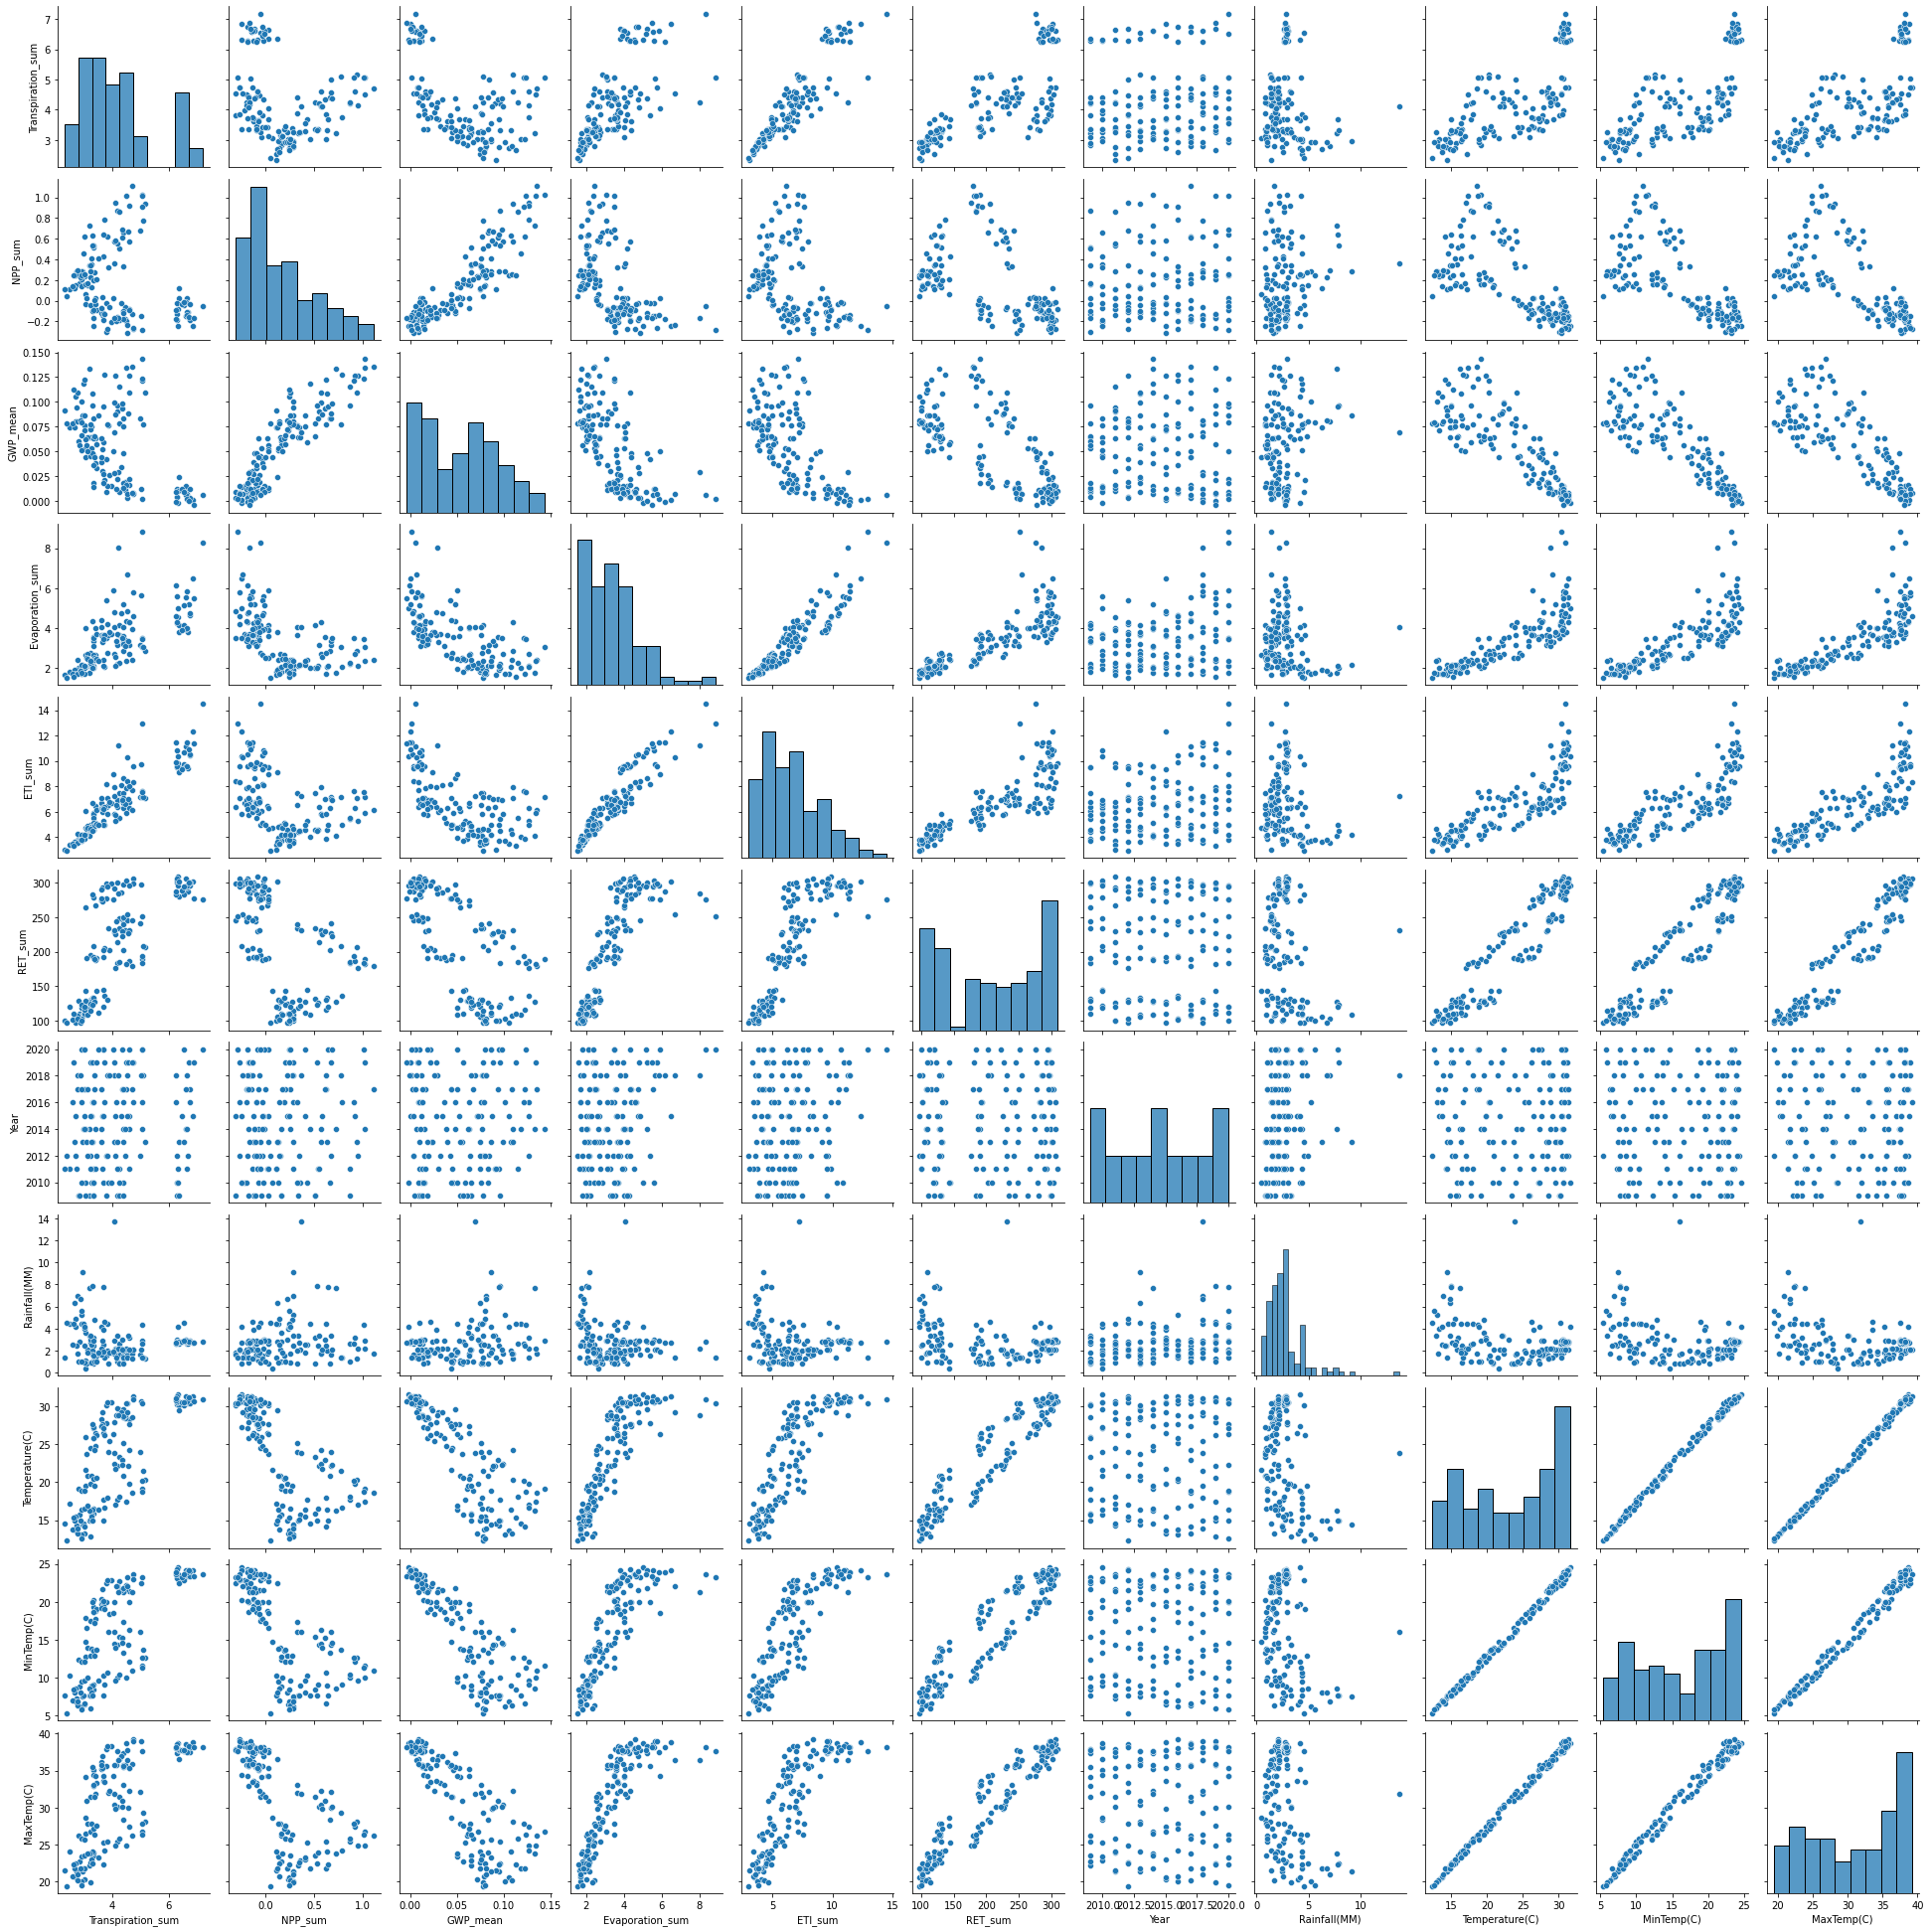

In [ ]:
plt.figure(figsize=(20, 15))
sb.pairplot(df)
plt.show()

## **Correlation**

#### **Pairwise Correlation**

In [ ]:
def corr_heatmap(df, mask: bool):
  """Method to visualize correlation."""
  plt.figure(figsize=(24, 8))
  plt.title('Pairwise Correlation Matrix')
  if mask is True:
      # Create mask
      mask = np.zeros_like(df.corr(), dtype=np.bool)
      mask[np.triu_indices_from(mask)] = True
      # Generate the heatmap
      sb.heatmap(df.corr(), annot=True, cmap='cividis', linewidth=.5,
                 mask=mask)
  else:
      sb.heatmap(df.corr(), annot=True, cmap='cividis')
  return plt.show()

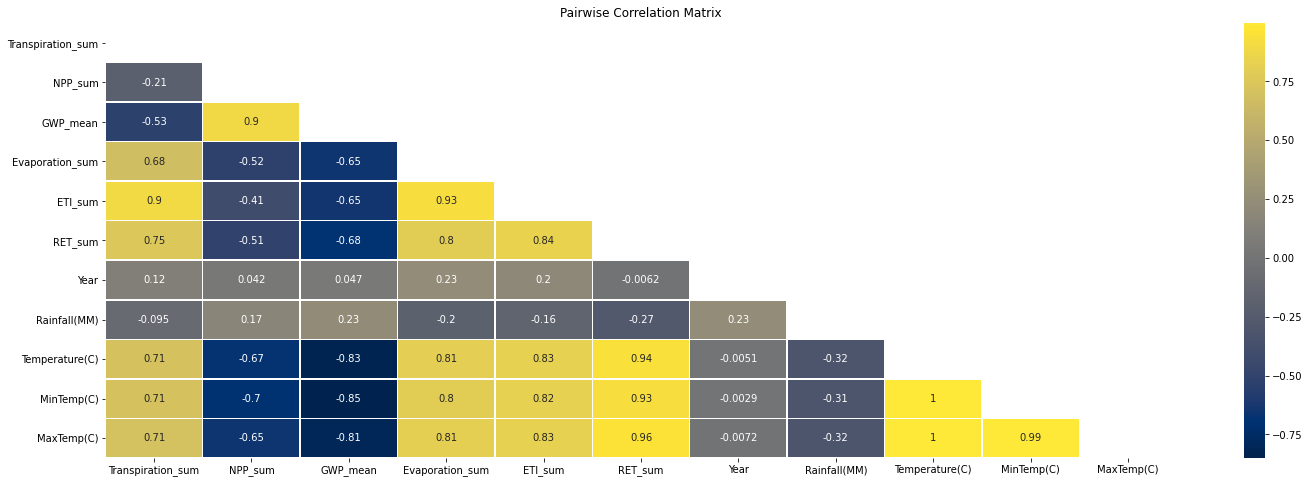

In [ ]:
corr_heatmap(df, mask=True)

Since the pairwise correlation matrix is symmetrical, we can basically implement a mask to eliminate redundancy.
However, in a real-world scenario, relationships are not always symmetrical and therefore we will implement a predictive power score to examine asymmetric relationship

#### **Predictive Power Score**.

*For more information click [here]('https://towardsdatascience.com/rip-correlation-introducing-the-predictive-power-score-3d90808b9598')*

In [ ]:
def pps_heatmap(df):
  
  """
      Function for calculating the Predictive Power Score and plotting a heatmap
          Args:
              Pandas DataFrame or Series object
          __________
          Returns:
              figure
  """
  pps_mtrx = pps.matrix(df)
  pps_mtrx1 = pps_mtrx[['x', 'y', 'ppscore']].pivot(columns='x', index='y',
                                            values='ppscore')
  plt.figure(figsize = (24, 8))
  ax = sb.heatmap(pps_mtrx1, vmin=0, vmax=1, cmap="afmhot_r", linewidths=0.5,
                  annot=True)
  ax.set_title("Predictive Power Score Matrix")
  ax.set_xlabel("feature")
  ax.set_ylabel("target")
  return ax

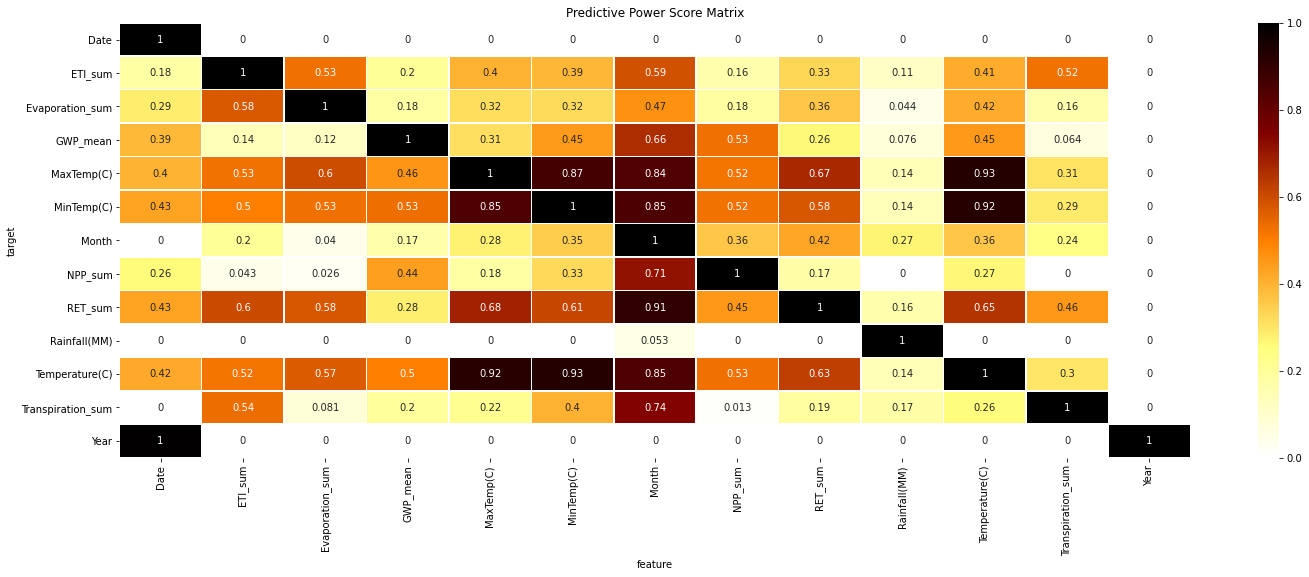

In [ ]:
pps_heatmap(df)

By examining the two heatmaps, we can conclude that the features below are have some kind of relationship 

*   Actual EvapoTranspiration & Interception (ETI_sum)
*   Evaporation (Evaporation_sum)
*   Temperature (C)
*   Transpiration





## **Visualization**

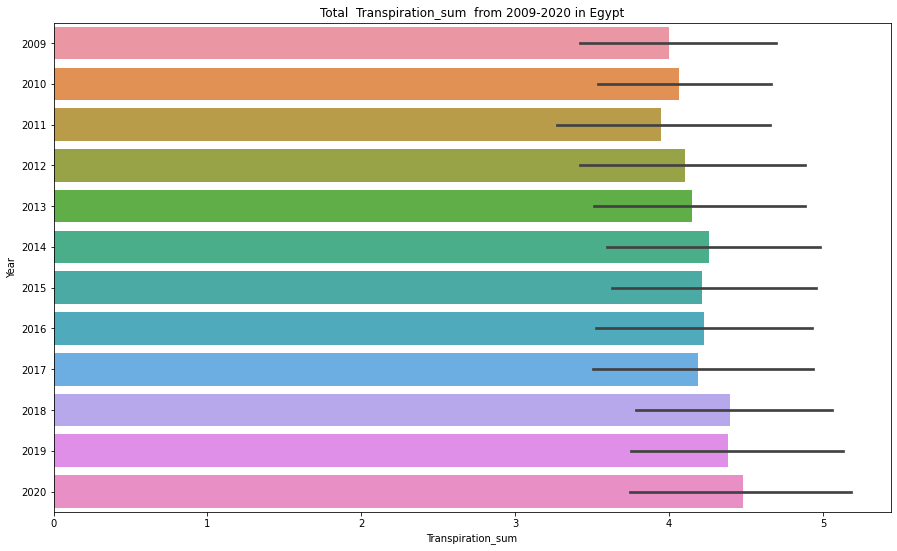

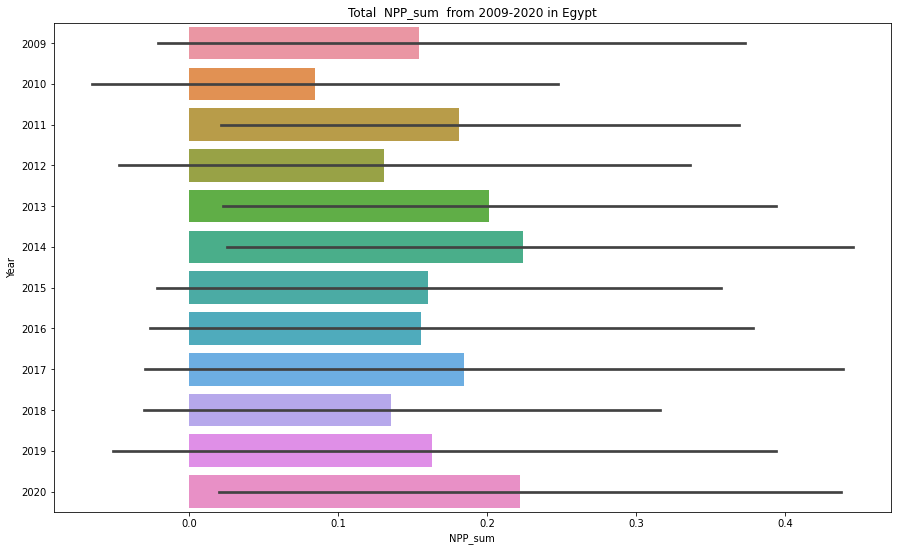

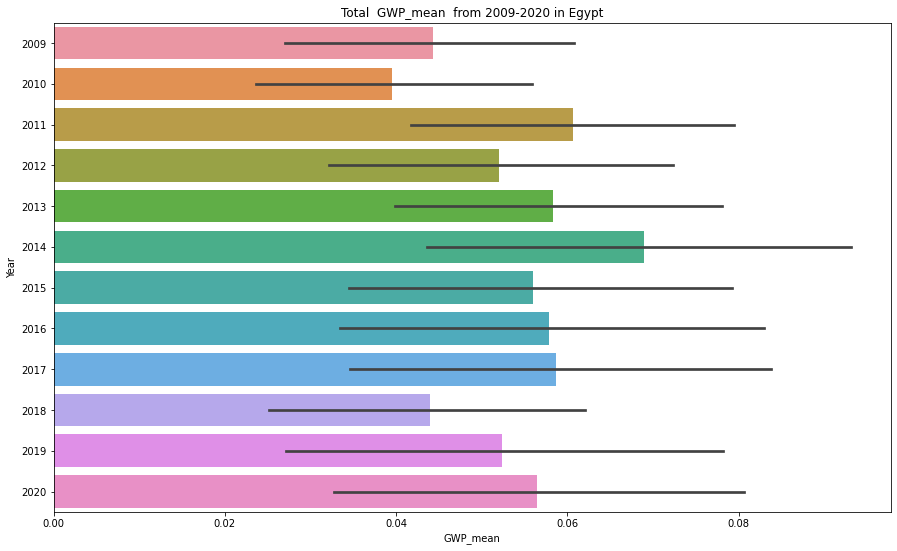

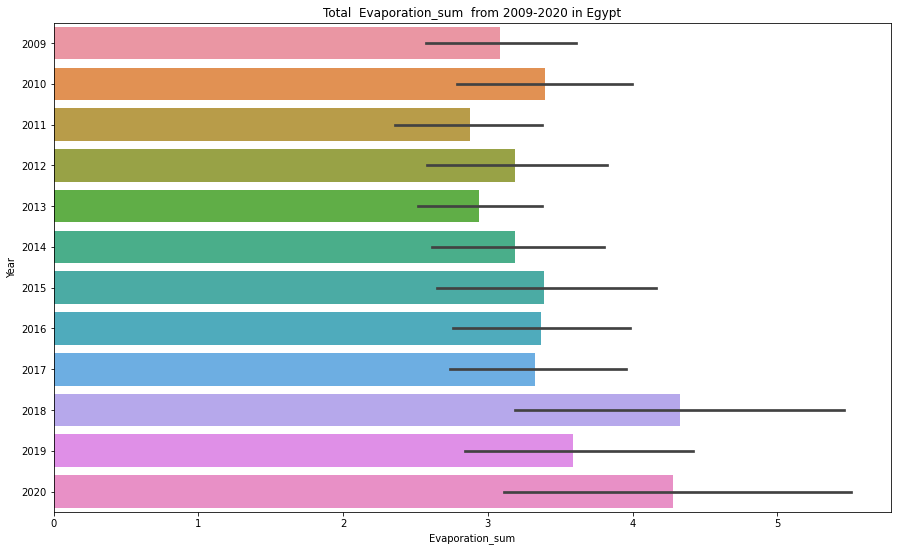

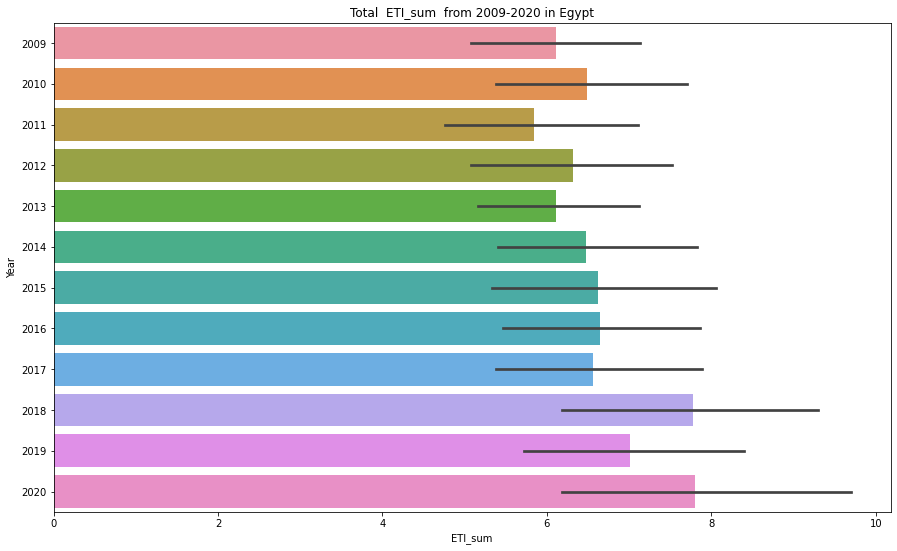

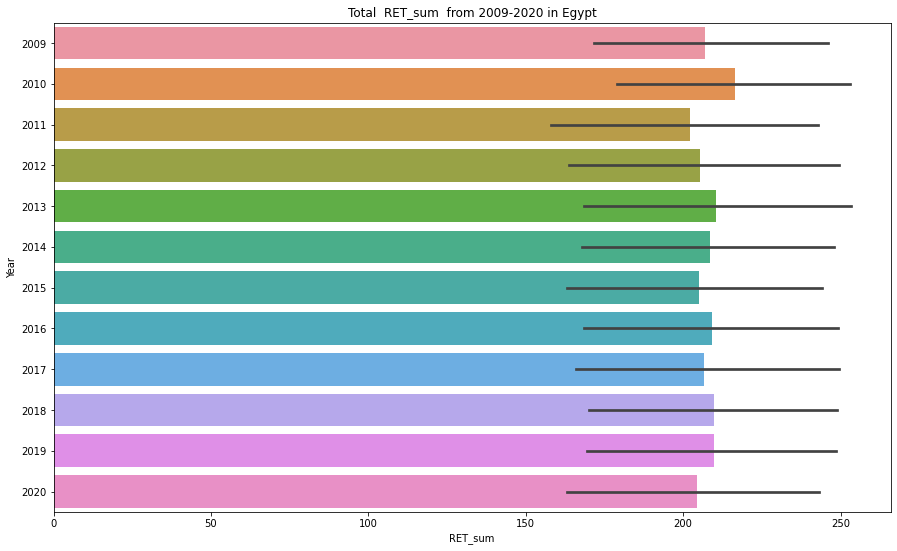

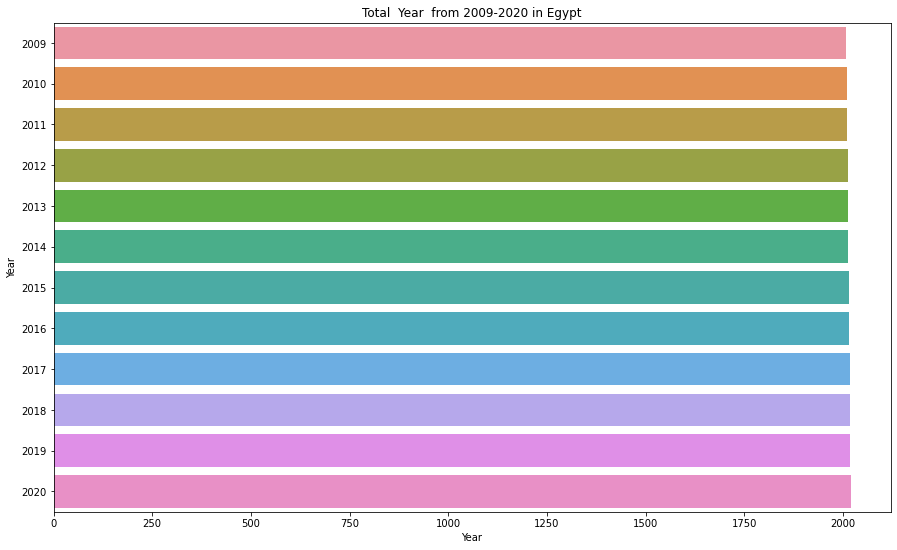

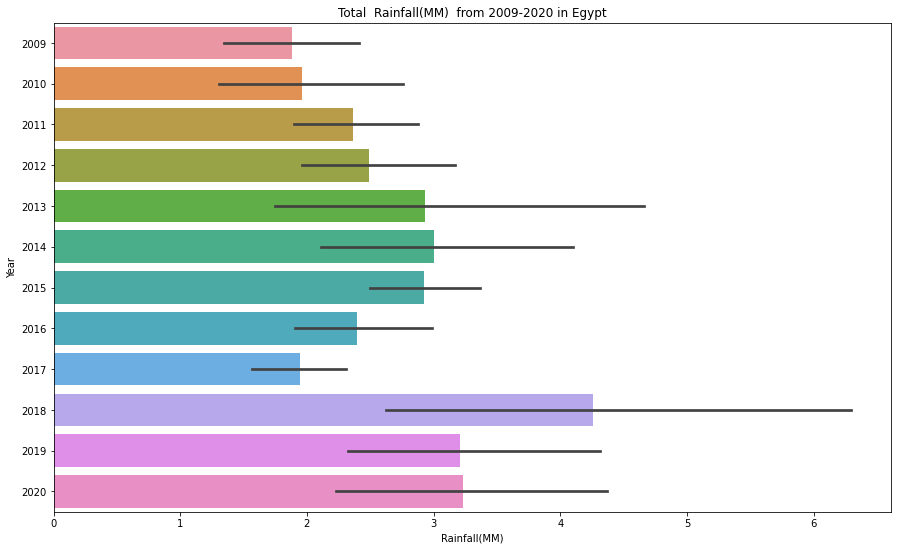

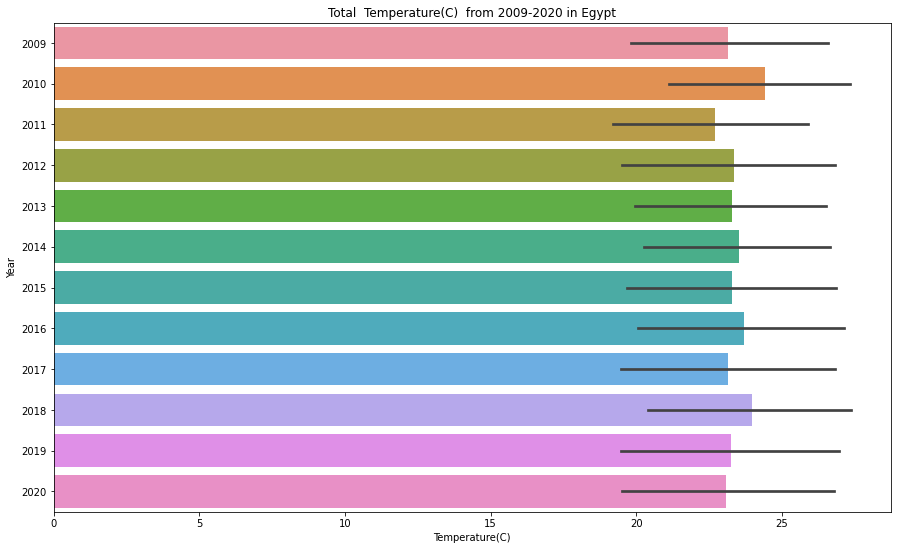

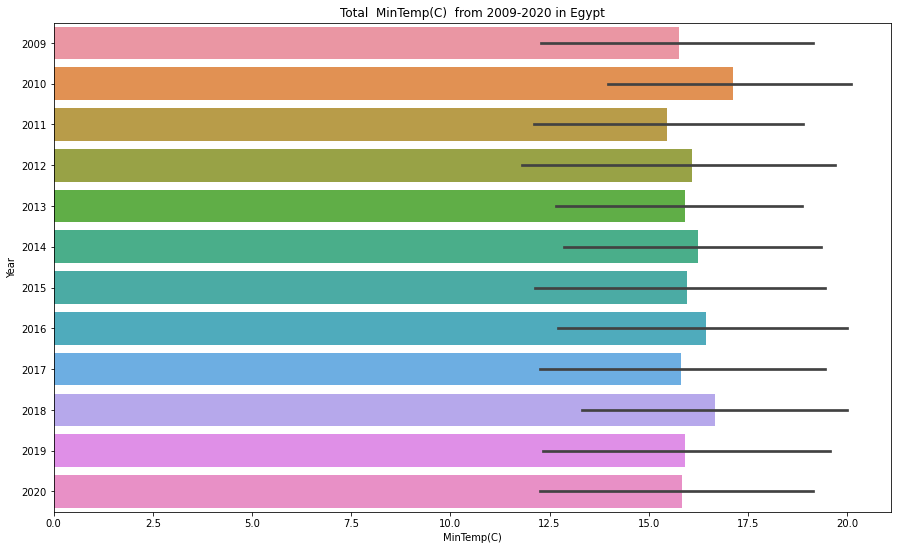

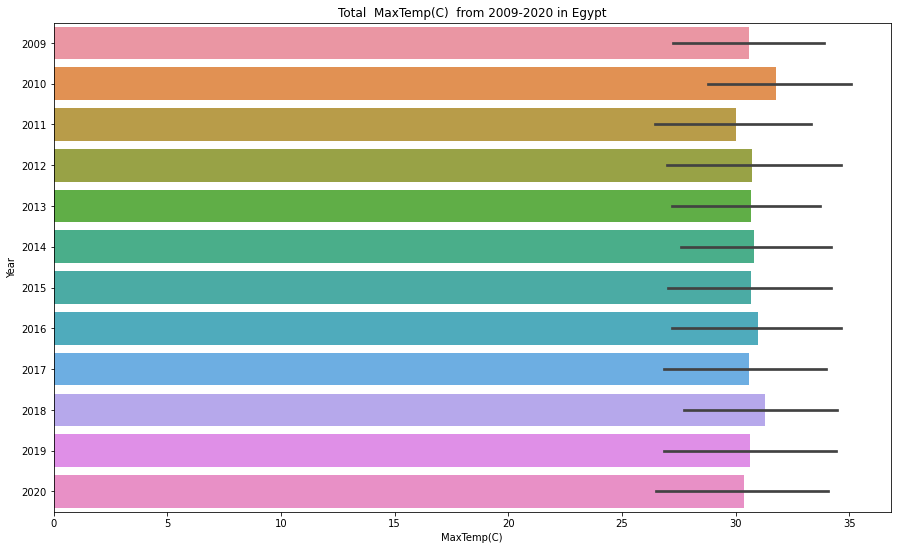

In [ ]:
cols = list(df.describe().columns)

for col in cols:
  plt.figure(figsize=(15, 9))
  sb.barplot(x=str(col), y='Year', data=df, orient='h')
  plt.title('Total  ' + str(col) + '  from 2009-2020 in Egypt')
  plt.show()

Here we can observe that Rainfall in Egypt was increasing steadily up until 2014 when it started dropping to an all-time low in 2017 at less that **2 mm/day.**
This was due to the rising sea levels that Egypt began experiencing around August of 2017

Please find the interactive web application
 [here](https://omdena-egypt.herokuapp.com/)